# Brains, Primates and Artifical Intelligence
### Gen Reynolds
<table><tr><td><img src="slide_images/d305ec2a-9f5a-4894-8cd3-a7c43bb0756b-brain-640.jpg"width="75%"></td><td> <img src="slide_images/MVIMG_20180630_141951.jpg"width="50%"></td><td><img src="slide_images/giphy.gif"width="100%"></td></tr></table>
    

## What is Artifical Intelligence?
<table><tr><td><img src="slide_images/landscape-1480328982-westworld-episode-9-evan-rachel-wood.jpg"width="85%"></td><td><img src="slide_images/AmazonEchoDotFront-630x499.jpg",width="100%"></td><td><img src="slide_images/s3-news-tmp-6618-watson-tile--2x1--940.gif"width="100%"></td></tr></table>


<ul>
  <li>The ability of a machine to perform tasks that are usually associated with having human intelligence</li>
  <li>AI effect - "AI is whatever hasn't been done yet"</li>
  <li>Watson Robot</li> 
  <li>Alexa, Siri and google assistant</li>
</ul>  

## The Human Brain
<div><img src="slide_images/brain-anatomy-44-728.jpg"width="75%"></div>


<ul>
  <li>We have evolved adapting to information we recieve from our environment</li>
  <li>The brain processes this information and perform actions </li>
  <li>Different parts of the brain are associated with different actions</li>
  <li>The specialised neurons within these areas communicate with each other to form neuron networks </li>
</ul> 

### Biological Neuron
<div><img src="slide_images/ba4196a3ef1255b9cdaa9308fdcfbcbb.jpg"width="75%"></div>

## Machine Learning and Neural Networks
Machine Learning = Providing Machines with data so they can learn from it themselves

### Artifical Neurons - inputs, weights, biases 
<div><img src="slide_images/neuronart.jpeg"width="75%"></div>
<ul>
<li>inputs which each have their own weight</li>
<li>weight = importance of the inputs to the outputs</li>
<li>Is the sum of the input weights greater than the threshold?</li>
<li>Perform action/ Make decision</li>
</ul>

### Neural Network - lots of layers of nodes
<div><img src="slide_images/0_0mia7BQKjUAuXeqZ.jpeg"width="75%"></div>


## Learning How to Make A Model Using Kaggle's Deep Learning Tutorial

In [1]:
# Pointing the code towards the files to use for the model training
from os.path import join
#Want to make this read straight from a zip file! Currently have to unzip the file 
image_dir = 'tutorial_files/indentifying_dog_breeds/train'
# Testing with one image, want to select a number randomn images within the folder
img_paths = [join(image_dir, filename) for filename in
          ['cocker_spaniel.jpg']]


#### Creating a function to read the images and prepare them for modelling 

In [2]:
import numpy as np
from PIL import Image
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size= 224

def img_read_and_prepare(img_paths,img_height=image_size,img_width=image_size):
    imgs=[load_img(img_path,target_size=(img_height,img_width))for img_path in img_paths]
    img_array= np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

#### Creating tutorial model using pretrained weights to make predictions

In [3]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='tutorial_files/ResNet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [4]:
test_data = img_read_and_prepare(img_paths)
preds = my_model.predict(test_data)

#### Visualising the Model

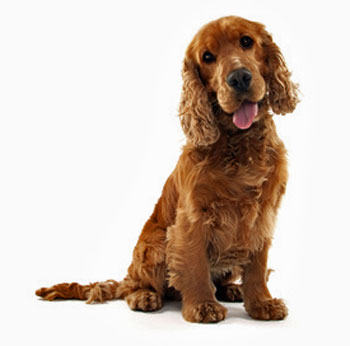

[('n02102318', 'cocker_spaniel', 0.54071003), ('n02102480', 'Sussex_spaniel', 0.35997143), ('n02102177', 'Welsh_springer_spaniel', 0.018370267)]


In [5]:
import sys
sys.path.append('tutorial_files/utils')
from decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels= decode_predictions(preds, top=3, class_list_path='tutorial_files/ResNet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

## Using Transfer Learning to Create my own Model To Identify Primates

In [6]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import pandas as pd
image_dir = 'primate_model/Demo'
img_paths = [join(image_dir, filename) for filename in
          ['1122-japanese-macaque.jpg']]

#Here I am setting the number of node classes I want my model to group it's predictions into
cols = ['Class','Latin Name', 'Common Name','Train Images', 'Validation Images']
classes = pd.read_csv("primate_model/monkey_labels.txt", names=cols, skiprows=1 ,usecols=range(3))
num_classes = len(classes)
classes

,Class,Latin Name,Common Name
0,n0,alouatta_palliata\t,mantled_howler
1,n1,erythrocebus_patas\t,patas_monkey
2,n2,cacajao_calvus\t,bald_uakari
3,n3,macaca_fuscata\t,japanese_macaque
4,n4,cebuella_pygmea\t,pygmy_marmoset
5,n5,cebus_capucinus\t,white_headed_capuchin
6,n6,mico_argentatus\t,silvery_marmoset
7,n7,saimiri_sciureus\t,common_squirrel_monkey
8,n8,aotus_nigriceps\t,black_headed_night_monkey
9,n9,trachypithecus_johnii,nilgiri_langur


In [7]:
classes = classes['Common Name']
classes.to_json('primate_model/monkey_labels.json')

In [8]:
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
resnet_weights_path='tutorial_files/ResNet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
#Here I am excluding the top layer of my neural network because I want to modify the existing functionality to test my own data
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))
#In this case because the model is already trained I am not going to train the first layer of the network
my_new_model.layers[0].trainable=False

#### Compiling my model

In [9]:
# adam optimiser improves acuracy of model
my_new_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#### Fitting My Model

In [10]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


image_size = 224

data_generator = ImageDataGenerator(preprocessing_function= preprocess_input)

train_generator = data_generator.flow_from_directory(
    'primate_model/training',
    target_size = (image_size,image_size),
    batch_size = 24,
    class_mode = 'categorical')

validation_generator = data_generator.flow_from_directory(
    'primate_model/validation',
    class_mode= 'categorical')

my_new_model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 3,
    validation_data = validation_generator,
    validation_steps = 1,
)

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/3
8/8 [==============================] - 196s 25s/step - loss: 2.3188 - acc: 0.1667 - val_loss: 1.3693 - val_acc: 0.5938
Epoch 2/3
8/8 [==============================] - 187s 23s/step - loss: 1.4956 - acc: 0.4896 - val_loss: 1.0628 - val_acc: 0.5312
Epoch 3/3
8/8 [==============================] - 176s 22s/step - loss: 0.9737 - acc: 0.7500 - val_loss: 0.4365 - val_acc: 0.9688


In [11]:
test_data = img_read_and_prepare(img_paths)
preds = my_new_model.predict_generator(generator=validation_generator, steps=1)
import json
def decode_predictions(preds, top=3, class_list_path=None):
    
  CLASS_INDEX = json.load(open(class_list_path))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [(CLASS_INDEX[str(i)], pred[i]) for i in top_indices]
    result.sort(key=lambda x: x[1], reverse=True)
    results.append(result)
  return result

In [12]:
#Visualsing the Model

from IPython.display import Image, display
most_likely_labels = decode_predictions(preds, top=3,class_list_path="primate_model/monkey_labels.json")
most_likely_labels

[(' black_headed_night_monkey     ', 0.78881687),
 (' common_squirrel_monkey        ', 0.10879718),
 (' pygmy_marmoset                ', 0.071631916)]

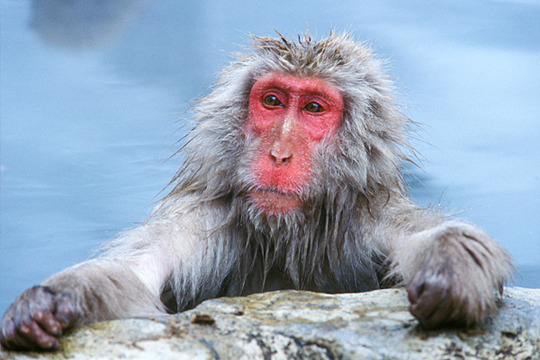

(' black_headed_night_monkey     ', 0.78881687)


In [13]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

## Some awesome resources

<html><body><p><u>Websites:</u>.</p></body></html>

Kaggle - https://www.kaggle.com

Tensor Flow playground - https://playground.tensorflow.org

Machine box - https://machinebox.io

<html><body><p><u>Youtube channels:</u>.</p></body></html>

3 Brown 1 Blue - https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw

Siraj Raval (Really Quick tutorial!!) - https://www.youtube.com/watch?v=QfNvhPx5Px8
